<a href="https://colab.research.google.com/github/bonareri/Machine_Learning_1/blob/main/Obesity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
#loading the data
obesity_analysis = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [70]:
obesity_analysis.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [78]:
obesity_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [72]:
obesity_analysis.isnull().sum()

,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0
SMOKE,0


In [27]:
# drop irrelevant features
obesity_analysis.drop(['CALC', 'CH2O'], axis=1, inplace=True)

### Data Analysis

In [7]:
# Identify categorical columns
categorical_columns = obesity_analysis.select_dtypes(include=['object']).columns

# Print unique categories for each categorical column
for col in categorical_columns:
    print(f"Column: {col}")
    print(obesity_analysis[col].value_counts())
    print("\n")

Column: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64


Column: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64


Column: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64


Column: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64


Column: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64


Column: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64


Column: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64


Column: NObeyesdad
NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64




##ANALYSIS

In [34]:
# Filter out non-numeric columns
numeric_columns = diabetes_analysis.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric columns only
correlation_matrix_numeric = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix for Numeric Columns:")
print(correlation_matrix_numeric)

Correlation Matrix for Numeric Columns:
             Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000  


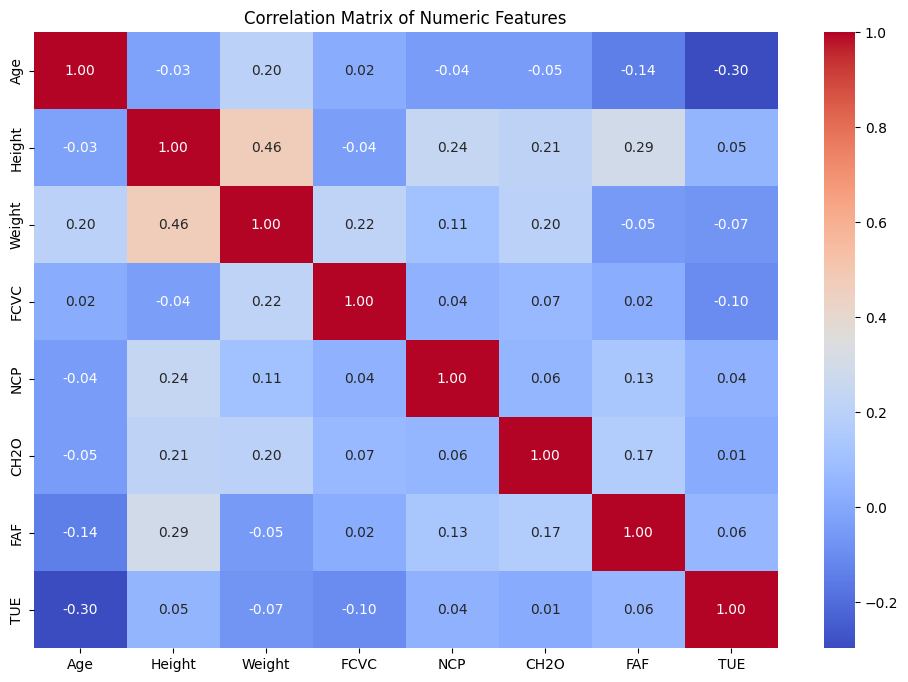

In [20]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.show()

### ENCODING

In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Define the order of categories for 'NObeyesdad'
order = [
    'Insufficient_Weight', 'Normal_Weight',
    'Overweight_Level_I', 'Overweight_Level_II',
    'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
]

# Create a mapping dictionary for explicit encoding
encoding_map = {category: index for index, category in enumerate(order)}

# Apply the mapping to the DataFrame
obesity_analysis['Encoded_NObeyesdad'] = obesity_analysis['NObeyesdad'].map(encoding_map)

# Display the DataFrame with the correctly encoded values
print(obesity_analysis)



      Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE  

In [30]:
# Ensure unique mapping of encoded values to their categorical counterparts
encoded_with_categories = (
    obesity_analysis[['NObeyesdad', 'Encoded_NObeyesdad']]
    .drop_duplicates()
    .sort_values('Encoded_NObeyesdad')  # Sort by encoded values for clarity
)

# Display the result
print(encoded_with_categories)

              NObeyesdad  Encoded_NObeyesdad
59   Insufficient_Weight                   0
0          Normal_Weight                   1
3     Overweight_Level_I                   2
4    Overweight_Level_II                   3
10        Obesity_Type_I                   4
68       Obesity_Type_II                   5
202     Obesity_Type_III                   6


In [33]:
import pandas as pd

# Assuming obesity_analysis is already defined and contains your data

# Define the columns you want to one-hot encode
categorical_columns = [
    'Gender', 'family_history_with_overweight', 'FAVC',
    'CAEC', 'SMOKE', 'SCC', 'MTRANS'
]

# Apply one-hot encoding to the specified columns
obesity_analysis_encoded = pd.get_dummies(obesity_analysis, columns=categorical_columns, drop_first=True)

# Display the DataFrame with the encoded columns
print(obesity_analysis_encoded.head())

    Age  Height  Weight  FCVC  NCP  FAF  TUE           NObeyesdad  \
0  21.0    1.62    64.0   2.0  3.0  0.0  1.0        Normal_Weight   
1  21.0    1.52    56.0   3.0  3.0  3.0  0.0        Normal_Weight   
2  23.0    1.80    77.0   2.0  3.0  2.0  1.0        Normal_Weight   
3  27.0    1.80    87.0   3.0  3.0  2.0  0.0   Overweight_Level_I   
4  22.0    1.78    89.8   2.0  1.0  0.0  0.0  Overweight_Level_II   

   Encoded_NObeyesdad  Gender_Male  ...  FAVC_yes  CAEC_Frequently  \
0                   1        False  ...     False            False   
1                   1        False  ...     False            False   
2                   1         True  ...     False            False   
3                   2         True  ...     False            False   
4                   3         True  ...     False            False   

   CAEC_Sometimes  CAEC_no  SMOKE_yes  SCC_yes  MTRANS_Bike  MTRANS_Motorbike  \
0            True    False      False    False        False             False   
1 

### Splitting the dataset

In [39]:
from sklearn.model_selection import train_test_split


target_encoded_columns = ['Encoded_NObeyesdad']

X = obesity_analysis.drop(columns=target_encoded_columns)
y = obesity_analysis[target_encoded_columns]

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Flatten the target variable for classification
y_train_flat = y_train.values.ravel()
y_test_flat = y_test.values.ravel()

# Display the shapes of the training and testing datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (1688, 25) (1688, 1)
Testing set shape: (423, 25) (423, 1)


### MODELLING

In [41]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#### Logistic Regression

In [42]:
# Create a pipeline with StandardScaler and Logistic Regression
log_reg_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Perform cross-validation
scores = cross_val_score(log_reg_pipeline, X_train, y_train_flat, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate the mean accuracy
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


### SVM

In [43]:
from sklearn.svm import SVC

svm_pipeline = make_pipeline(StandardScaler(), SVC(C=1.5))
scores = cross_val_score(svm_pipeline, X_train, y_train_flat, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.99112426 0.98816568 0.99408284 0.97626113 0.9851632 ]
Mean accuracy: 0.9869594226818604


In [45]:
from sklearn.svm import SVC

svm_pipeline = make_pipeline(StandardScaler(), SVC(C=1.5, kernel='linear'))
scores = cross_val_score(svm_pipeline, X_train, y_train_flat, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [1. 1. 1. 1. 1.]
Mean accuracy: 1.0


### KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier


knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5))
scores = cross_val_score(knn_pipeline, X_train, y_train_flat, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)

Cross-validation scores: [0.97633136 0.96745562 0.97337278 0.94065282 0.97626113]
Mean accuracy: 0.9668147419802293


In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='distance', p=2))
scores = cross_val_score(knn_pipeline, X_train, y_train_flat, cv=5, scoring='accuracy')
print("Cross-validation scores:", scores)
mean_accuracy = scores.mean()
print("Mean accuracy:", mean_accuracy)


Cross-validation scores: [0.97928994 0.97337278 0.97337278 0.94065282 0.97922849]
Mean accuracy: 0.9691833617193124
